<a href="https://colab.research.google.com/github/YUCAVALCANTE/ML_Studies/blob/main/%C3%81RVORE_DE_DECIS%C3%83O.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import tree
import matplotlib.pyplot as plt

# ------------------------------------------------------------
# 1) Dataset do exemplo (simulação didática)
# ------------------------------------------------------------
data = {
    'Idade': [
        22, 25, 29, 31, 34, 38, 42, 45, 48, 52,
        55, 58, 61, 65, 68, 72
    ],
    'Sexo': [
        'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M',
        'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F'
    ],
    'Colesterol': [
        'Normal', 'Normal', 'Alto', 'Normal',
        'Normal', 'Alto', 'Normal', 'Alto',
        'Normal', 'Alto', 'Normal', 'Alto',
        'Normal', 'Alto', 'Alto', 'Normal'
    ],
    'Droga': [
        'DrogaA', 'DrogaA', 'DrogaA', 'DrogaB',
        'DrogaA', 'DrogaB', 'DrogaB', 'DrogaB',
        'DrogaB', 'DrogaA', 'DrogaB', 'DrogaA',
        'DrogaB', 'DrogaA', 'DrogaA', 'DrogaB'
    ]
}

df = pd.DataFrame(data)

# ------------------------------------------------------------
# 2) Encoding: transformando texto em número
# ------------------------------------------------------------
# Observação: para variáveis binárias (Sexo) e poucas categorias (Colesterol),
# LabelEncoder funciona bem para um exemplo didático.
# Em casos com muitas categorias (ex.: "Região"), One-Hot costuma ser mais seguro.

le_sexo = preprocessing.LabelEncoder()
le_colesterol = preprocessing.LabelEncoder()

X = pd.DataFrame()
X['Idade'] = df['Idade']
X['Sexo'] = le_sexo.fit_transform(df['Sexo'])                # F=0, M=1
X['Colesterol'] = le_colesterol.fit_transform(df['Colesterol'])  # Alto=0, Normal=1 (depende da ordem interna)

y = df['Droga']

print("Features prontas (X):")
print(X)
print("\nTarget (y):")
print(y.value_counts())


Features prontas (X):
    Idade  Sexo  Colesterol
0      22     0           1
1      25     1           1
2      29     0           0
3      31     1           1
4      34     0           1
5      38     1           0
6      42     0           1
7      45     1           0
8      48     1           1
9      52     0           0
10     55     1           1
11     58     0           0
12     61     1           1
13     65     0           0
14     68     1           0
15     72     0           1

Target (y):
Droga
DrogaA    8
DrogaB    8
Name: count, dtype: int64


In [5]:
# ------------------------------------------------------------
# 3) Separação treino/teste
# ------------------------------------------------------------
# Com dataset pequeno, o objetivo aqui é didático.
# Em bases reais, a avaliação precisa ser mais robusta (CV, métricas por custo, etc.)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,
    random_state=42,
    stratify=y
)

# ------------------------------------------------------------
# 4) Treinando a árvore
# ------------------------------------------------------------
# criterion: "gini" ou "entropy"
# max_depth/min_samples_leaf ajudam a evitar uma árvore que "decora" os dados
model = DecisionTreeClassifier(
    criterion="gini",
    max_depth=3,
    min_samples_leaf=1,
    random_state=42
)

model.fit(X_train, y_train)

# ------------------------------------------------------------
# 5) Avaliação básica
# ------------------------------------------------------------
y_pred = model.predict(X_test)

print("Matriz de confusão:")
print(confusion_matrix(y_test, y_pred))

print("\nRelatório de classificação:")
print(classification_report(y_test, y_pred))


Matriz de confusão:
[[1 1]
 [0 2]]

Relatório de classificação:
              precision    recall  f1-score   support

      DrogaA       1.00      0.50      0.67         2
      DrogaB       0.67      1.00      0.80         2

    accuracy                           0.75         4
   macro avg       0.83      0.75      0.73         4
weighted avg       0.83      0.75      0.73         4



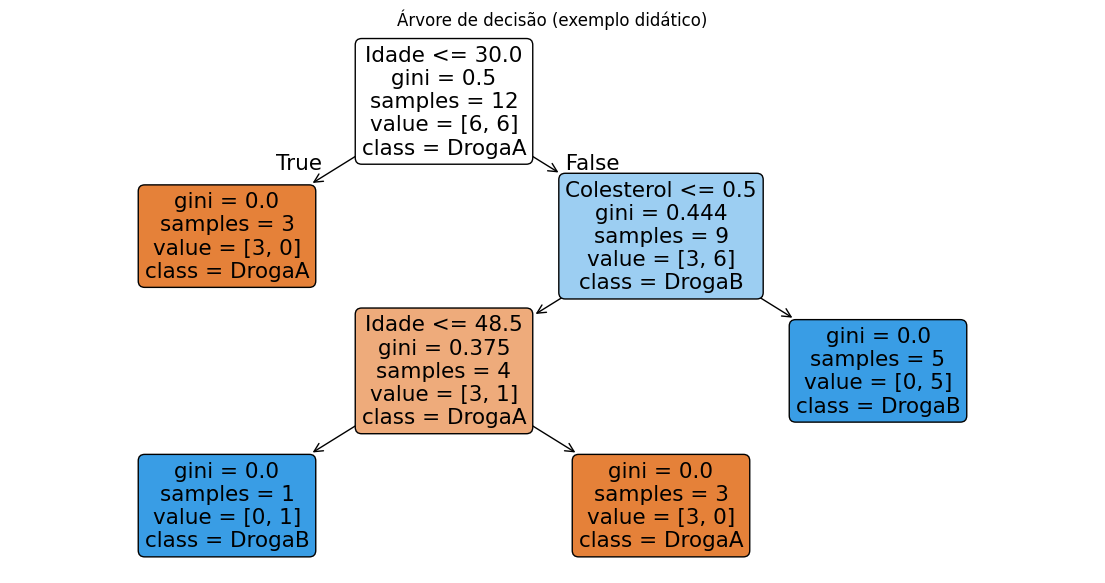

|--- Idade <= 30.00
|   |--- class: DrogaA
|--- Idade >  30.00
|   |--- Colesterol <= 0.50
|   |   |--- Idade <= 48.50
|   |   |   |--- class: DrogaB
|   |   |--- Idade >  48.50
|   |   |   |--- class: DrogaA
|   |--- Colesterol >  0.50
|   |   |--- class: DrogaB



In [6]:
# ------------------------------------------------------------
# 6) Plotando a árvore
# ------------------------------------------------------------
# feature_names: nomes das colunas em X
# class_names: classes do target
plt.figure(figsize=(14, 7))
tree.plot_tree(
    model,
    feature_names=X.columns,
    class_names=sorted(y.unique()),
    filled=True,
    rounded=True,
    impurity=True
)
plt.title("Árvore de decisão (exemplo didático)")
plt.show()

# ------------------------------------------------------------
# 7) Uma forma de “ler” a árvore em texto (útil quando ela cresce demais)
# ------------------------------------------------------------
rules_text = tree.export_text(model, feature_names=list(X.columns))
print(rules_text)
